Layers_number is an integers, each layers has four features, do traditional machine learning to figures out the relationships between each features.

PPT1-DAY2(group5):
Use the parameters to do some basic data preparation.

In [1]:
# dataset path: /content/rawdataDay2.csv
# dataset from the previous email Dr.Rajeev. The dataset is related the specular exprimental data from ORNL.
# read data if the dataset upload into colab
import pandas as pd
file_path = '/content/rawdataDay2.csv'
df = pd.read_csv(file_path, sep='\s+', header=None)  # '\s+' is a regex for one or more spaces
Q_data = df.iloc[:, 0]
R_data = df.iloc[:, 1]
print("First few entries of Q_data:\n", Q_data.head())
print("First few entries of R_data:\n", R_data.head())

First few entries of Q_data:
 0    0.009667
1    0.009761
2    0.009856
3    0.009954
4    0.010054
Name: 0, dtype: float64
First few entries of R_data:
 0    1.018704
1    1.005363
2    0.987997
3    0.986558
4    1.010663
Name: 1, dtype: float64


In [46]:
# find the Q and R range

print("Minimum of Q:", Q_data.min())
print("Maximum of Q:", Q_data.max())
print("Minimum of R:", R_data.min())
print("Maximum of R:", R_data.max())


Minimum of Q: 0.00966656
Maximum of Q: 0.0830257
Minimum of R: 2.675415e-06
Maximum of R: 0.008693184


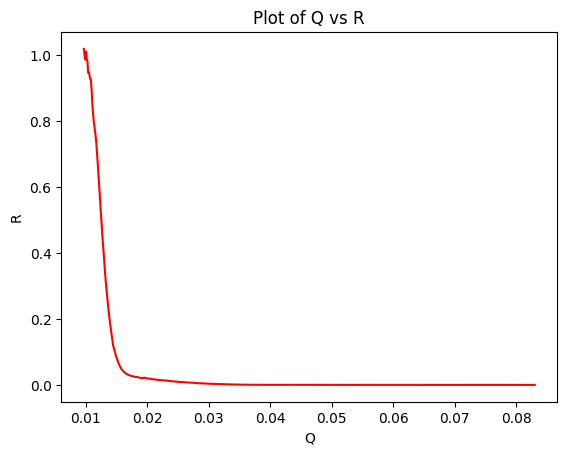

In [3]:
# plot the q and r using matplotlib series
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
ax.plot(Q_data, R_data, color='red')
ax.set_xlabel('Q')
ax.set_ylabel('R')
ax.set_title('Plot of Q vs R')
plt.show()


In [4]:
display(df)

,0,1,2,3
0,0.009667,1.018704,0.008693,0.000325
1,0.009761,1.005363,0.008129,0.000329
2,0.009856,0.987997,0.007771,0.000332
3,0.009954,0.986558,0.007477,0.000335
4,0.010054,1.010663,0.007398,0.000339
...,...,...,...,...
118,0.073767,0.000045,0.000004,0.002584
119,0.075980,0.000044,0.000004,0.002669
120,0.078260,0.000044,0.000004,0.002757
121,0.080607,0.000035,0.000004,0.002848


In [5]:
Q_data.describe()
R_data.describe()


count    123.000000
mean       0.202775
std        0.337961
min        0.000018
25%        0.000373
50%        0.013840
75%        0.226932
max        1.018704
Name: 1, dtype: float64

<Axes: >

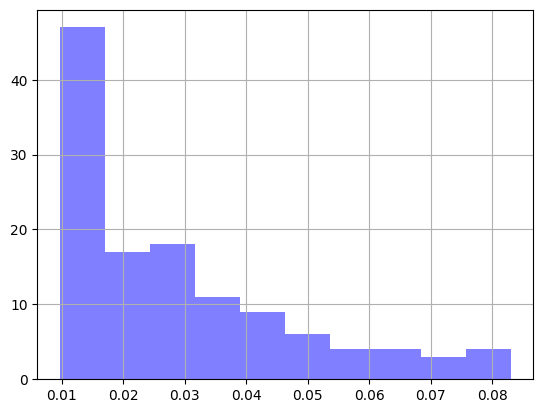

In [6]:
Q_data.hist(color='blue', alpha=0.5)
# plot data hist

<Axes: >

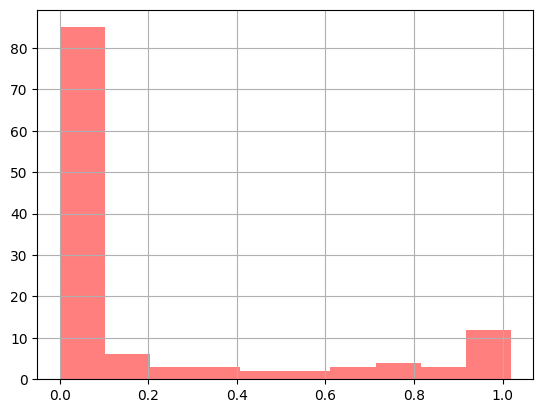

In [7]:
R_data.hist(color='red', alpha=0.5)

In [8]:

print(Q_data.corr(R_data))
print(R_data.corr(Q_data))


-0.5528052895889217
-0.5528052895889217


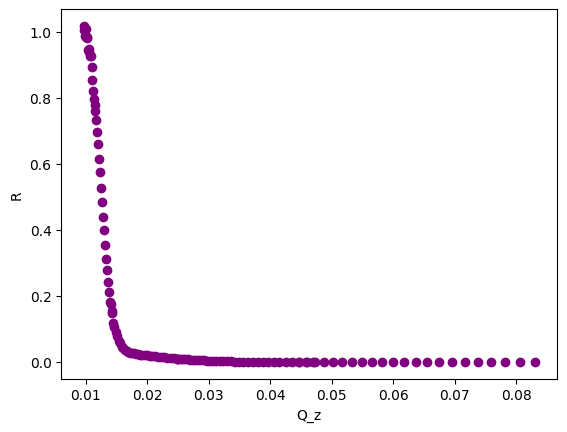

In [9]:
# Scatter plot to visualize the relationship between Q_data and R_data
import matplotlib.pyplot as plt
plt.scatter(Q_data, R_data,color ='purple')
plt.xlabel("Q_z")
plt.ylabel("R")
plt.show()


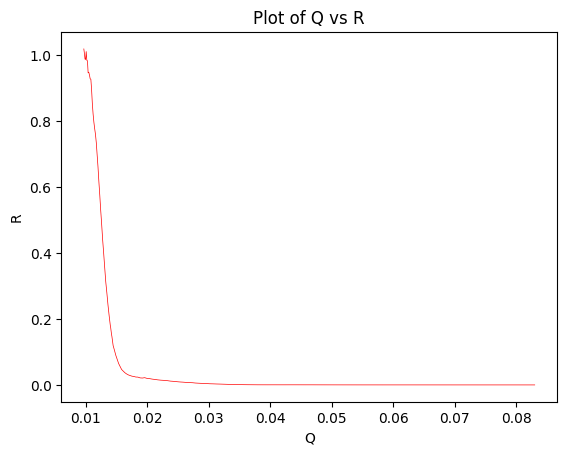

In [10]:
# show the relationship  between q and r

fig, ax = plt.subplots(1, 1)
ax.plot(Q_data, R_data, color='red', linewidth=0.5)
ax.set_xlabel('Q')
ax.set_ylabel('R')
ax.set_title('Plot of Q vs R')
plt.show()


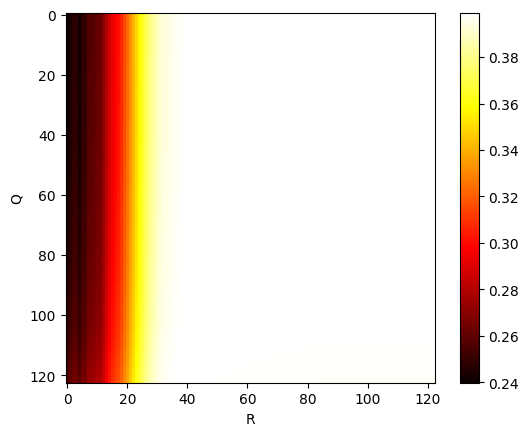

In [11]:
# Calculate the likelihood for Q and R
import numpy as np
from scipy.stats import norm

q_values = Q_data.unique()
r_values = R_data.unique()
likelihood = np.zeros((len(q_values), len(r_values)))

for i, q in enumerate(q_values):
  for j, r in enumerate(r_values):
    likelihood[i, j] = norm.pdf(r, loc=q, scale=1)

plt.imshow(likelihood, cmap='hot')
plt.xlabel("R")
plt.ylabel("Q")
plt.colorbar()
plt.show()


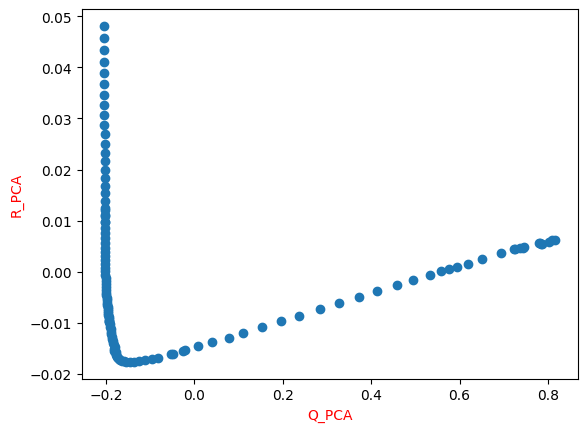

In [12]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df)

Q_pca = pca.transform(df)[:, 0]
R_pca = pca.transform(df)[:, 1]

plt.scatter(Q_pca, R_pca)
plt.xlabel("Q_PCA",color = 'red')
plt.ylabel("R_PCA",color = 'red')
plt.show()


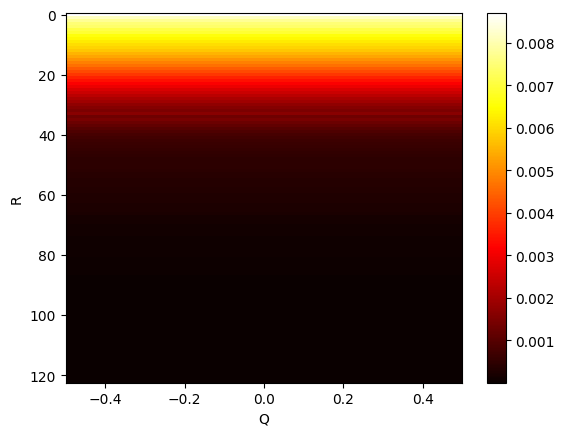

In [13]:
# the heatmap for q and z with real value

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data from the CSV file
df = pd.read_csv('/content/rawdataDay2.csv', sep='\s+', header=None)

# Extract the Q and Z columns
Q_data = df.iloc[:, 0]
R_data = df.iloc[:, 2]

# Create a heatmap of the Q and Z data
plt.imshow(R_data.values.reshape(-1, 1), cmap='hot', aspect='auto')
plt.xlabel('Q')
plt.ylabel('R')
plt.colorbar()
plt.show()


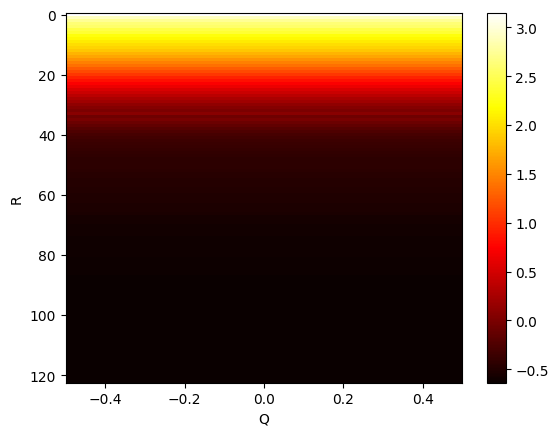

In [14]:
# normazation for the q and z while do heatmap

from sklearn.preprocessing import StandardScaler

# Standardize the Q and Z data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:, [0, 2]])

# Extract the scaled Q and Z data
Q_scaled = scaled_data[:, 0]
Z_scaled = scaled_data[:, 1]

# Create a heatmap of the scaled Q and Z data
plt.imshow(Z_scaled.reshape(-1, 1), cmap='hot', aspect='auto')
plt.xlabel('Q')
plt.ylabel('R')
plt.colorbar()
plt.show()


Layer 1:
Layer 2:
Layer 3:
Layer 4:
Layer 5:
Layer 6:
Average Thickness: 72.33999999999999


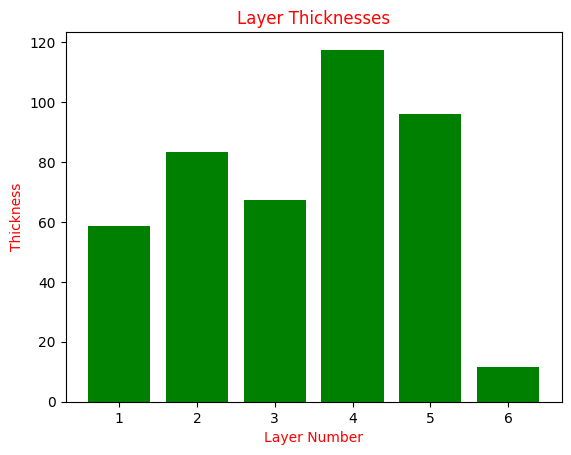

In [47]:
# Use refl1d's model to plot the NR with giving parameters
import matplotlib

# Define the layers with their properties for day1 parameters.

layers_number = 6
layers = [
    {"thickness": 58.479, "SLD": 4.3356, "solvent": 0, "roughness": 96.759},
    {"thickness": 83.334, "SLD": 4.9395, "solvent": 0, "roughness": 23.078},
    {"thickness": 67.121, "SLD": 4.1019, "solvent": 0, "roughness": 26.748},
    {"thickness": 117.4, "SLD": 1.9609, "solvent": 0, "roughness": 70.501},
    {"thickness": 96.051, "SLD": 3.8123, "solvent":0, "roughness": 35.343},
    {"thickness": 11.655, "SLD": 3.47, "solvent": 0, "roughness": 2.998}
]

def display_layers(layers):
    for i, layer in enumerate(layers, start=1):
        print(f"Layer {i}:")
        for prop, value in layer.items():
            print(f"  {prop}: {value}")
        print()
def display_layers(layers):
    for i, layer in enumerate(layers, start=1):
        print(f"Layer {i}:",)

display_layers(layers)
def average_thickness(layers):
    total_thickness = sum(layer["thickness"] for layer in layers)
    return total_thickness / len(layers)

print(f"Average Thickness: {average_thickness(layers)}")

import matplotlib.pyplot as plt

# Extract thickness values
thicknesses = [layer["thickness"] for layer in layers]
plt.bar(range(1, 7), thicknesses,color = 'green')
plt.xlabel('Layer Number',color ='red')
plt.ylabel('Thickness',color = 'red')
plt.title('Layer Thicknesses',color = 'red')
plt.show()

array([<Axes: title={'center': 'Layer Thickness'}, xlabel='Layer Number', ylabel='Thickness'>,
       <Axes: title={'center': 'Scattering Length Density (SLD)'}, xlabel='Layer Number', ylabel='SLD'>,
       <Axes: title={'center': 'Layer Roughness'}, xlabel='Layer Number'>],
      dtype=object)

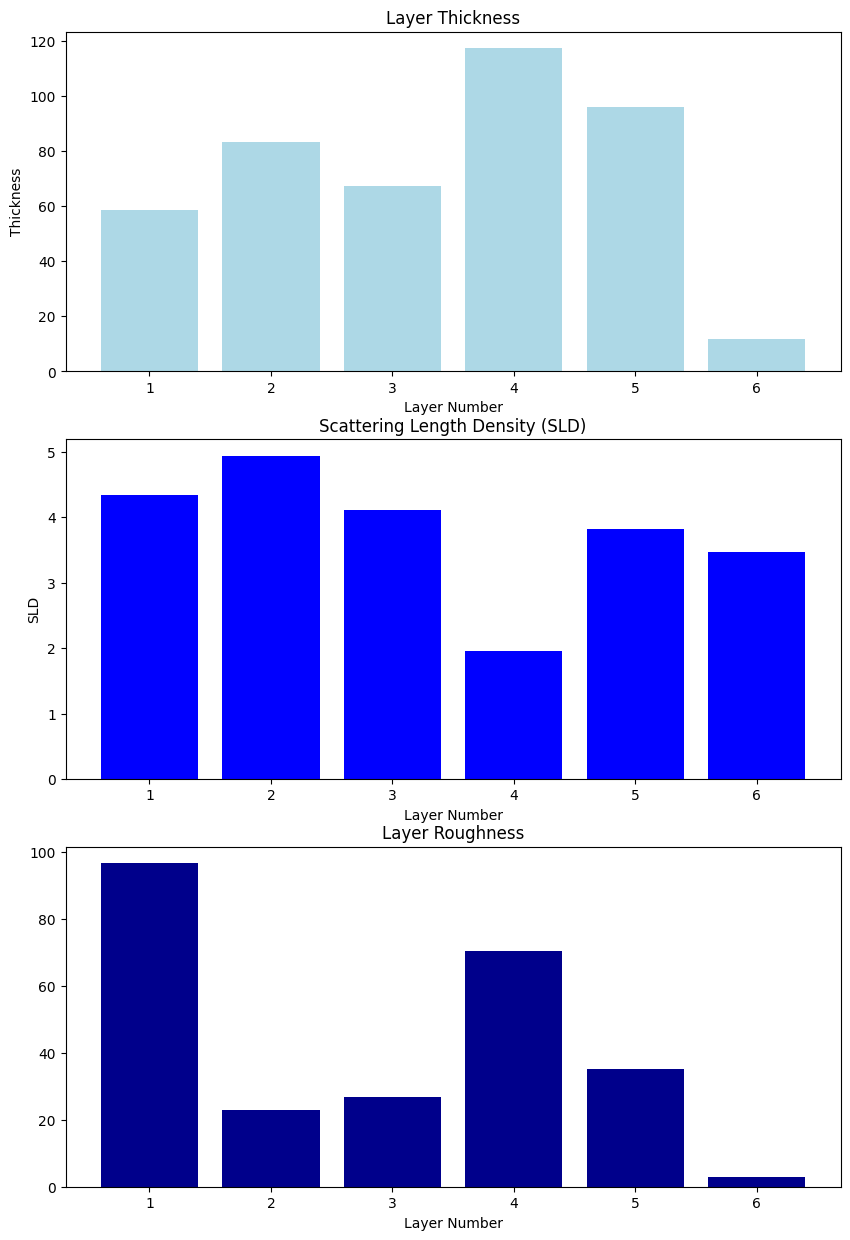

In [48]:
import matplotlib.pyplot as plt

# Extract thickness, SLD
thicknesses = [layer["thickness"] for layer in layers]
SLDs = [layer["SLD"] for layer in layers]
roughnesses = [layer["roughness"] for layer in layers]

fig, axs = plt.subplots(3, 1, figsize=(10, 15))  # 3 rows, 1 column
axs[0].bar(range(1, layers_number + 1), thicknesses, color='lightblue')
axs[0].set_title('Layer Thickness')
axs[0].set_xlabel('Layer Number')
axs[0].set_ylabel('Thickness')

axs[1].bar(range(1, layers_number + 1), SLDs, color='blue')
axs[1].set_title('Scattering Length Density (SLD)')
axs[1].set_xlabel('Layer Number')
axs[1].set_ylabel('SLD')

axs[2].bar(range(1, layers_number + 1), roughnesses, color='darkblue')
axs[2].set_title('Layer Roughness')
axs[2].set_xlabel('Layer Number')
axs


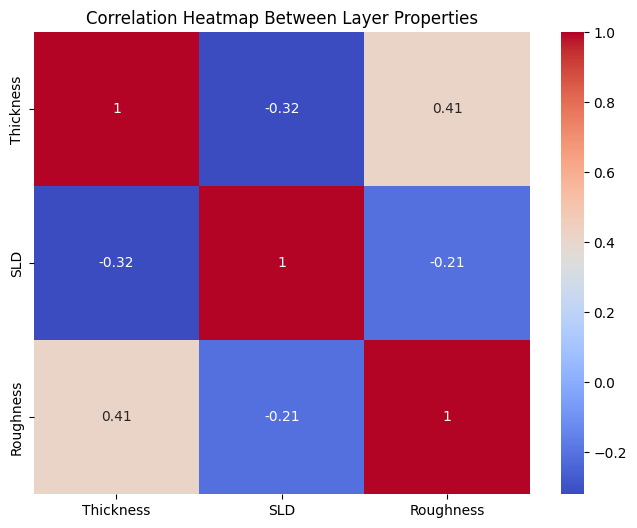

In [49]:
import numpy as np
import seaborn as sns

# Creating a data matrix
data_matrix = np.array([thicknesses, SLDs, roughnesses])

# Calculating correlation matrix
corr_matrix = np.corrcoef(data_matrix)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, xticklabels=['Thickness', 'SLD', 'Roughness'], yticklabels=['Thickness', 'SLD', 'Roughness'], cmap='coolwarm')
plt.title('Correlation Heatmap Between Layer Properties')
plt.show()

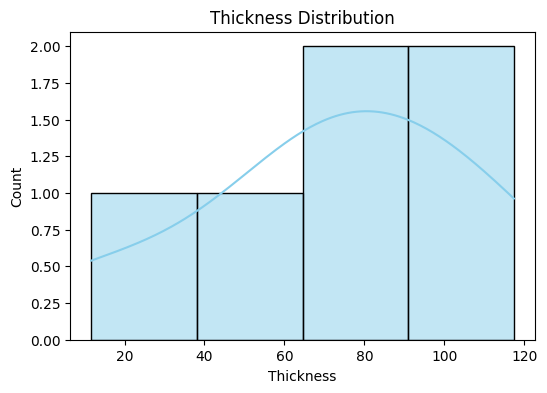

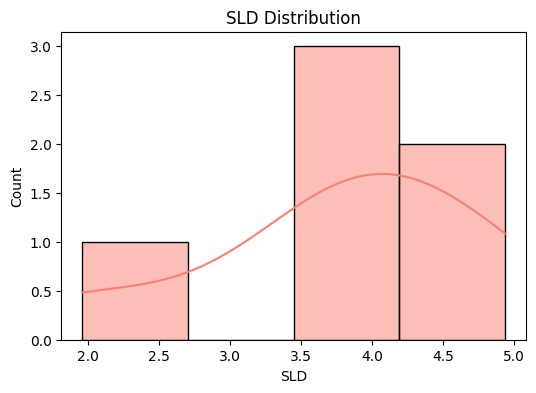

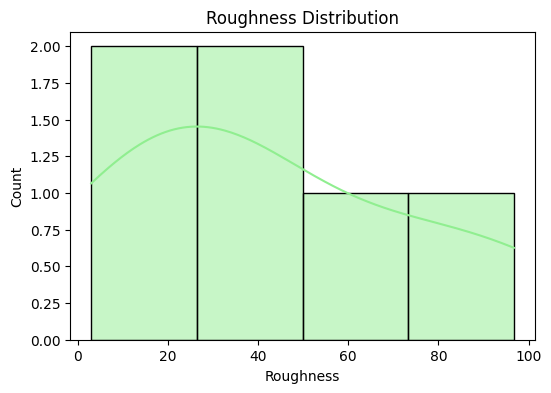

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Thickness, SLD, Roughness distribution
plt.figure(figsize=(6, 4))
sns.histplot(thicknesses, kde=True, color='skyblue')
plt.title('Thickness Distribution')
plt.xlabel('Thickness')
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(SLDs, kde=True, color='salmon')
plt.title('SLD Distribution')
plt.xlabel('SLD')
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(roughnesses, kde=True, color='lightgreen')
plt.title('Roughness Distribution')
plt.xlabel('Roughness')
plt.show()


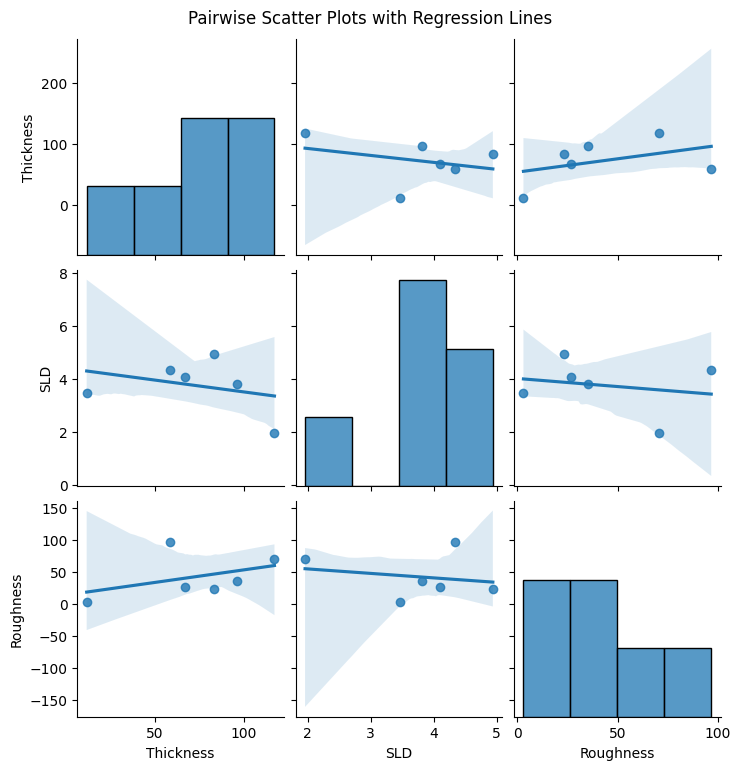

In [51]:
import seaborn as sns
import pandas as pd

data_df = pd.DataFrame(data_matrix.T, columns=['Thickness', 'SLD', 'Roughness'])

# Pairwise Scatter Plots
sns.pairplot(data_df, kind='reg')
plt.suptitle('Pairwise Scatter Plots with Regression Lines', y=1.02)
plt.show()


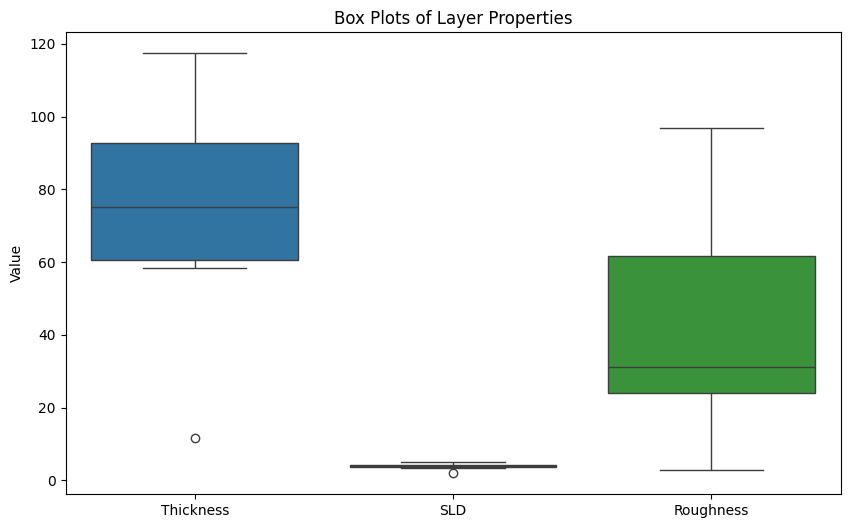

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Box Plots for each property
plt.figure(figsize=(10, 6))
sns.boxplot(data=pd.DataFrame(data_matrix.T, columns=['Thickness', 'SLD', 'Roughness']))
plt.title('Box Plots of Layer Properties')
plt.ylabel('Value')
plt.show()


In [53]:
pip install refl1d

In [22]:
pip install seaborn

In [23]:
pip install plotly


In [24]:
pip install ipympl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.2 MB/s eta 0:00:00


In [54]:
# import necessarily libraries.
import sys
import os
import math
import json
import numpy as np

import refl1d
from refl1d.names import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline
import seaborn as sea

In [55]:
# calculate the q_resolution

def q_resolution(q, wavelength):
  """Calculates the q resolution for a given q value and wavelength.

  Args:
    q: The q value.
    wavelength: The wavelength.

  Returns:
    The q resolution.
  """

  return 2 * math.pi / wavelength * abs(math.cos(math.atan(q / (4 * math.pi))))


In [56]:
# calculate the wavelengths

wavelength = 2 * math.pi / q  # q is the scattering vector
print(wavelength)


[775.56439079 767.53717796 759.59304803 751.7311411  743.95060613
 736.25060091 728.63029196 721.08885439 713.62547189 706.23933656
 698.92964889 691.69561763 684.53645972 677.45140022 670.4396722
 663.50051666 656.63318246 649.83692625 643.11101235 636.45471271
 629.86730682 623.34808161 616.8963314  610.51135782 604.19246971
 597.93898308 591.75022102 585.62551361 579.56419789 573.56561773
 567.62912381 561.75407353 555.93983095 550.18576668 544.49125789
 538.85568815 533.27844743 527.75893203 522.29654448 516.8906935
 511.54079392 506.24626664 501.00653854 495.82104245 490.68921706
 485.61050686 480.58436211 475.61023874 470.68759833 465.81590802
 460.99464046 456.22327378 451.50129149 446.82818245 442.20344083
 437.626566   433.09706255 428.61444017 424.17821362 419.78790272
 415.44303223 411.14313182 406.88773605 402.6763843  398.5086207
 394.3839941  390.30205803 386.26237064 382.26449465 378.3079973
 374.39245032 370.51742986 366.68251646 362.88729503 359.13135473
 355.41428899 

In [57]:

print(q_resolution)

<function q_resolution at 0x7c6d098b4af0>


In [59]:
from scipy.interpolate import CubicSpline
import random
def calculate_reflectivity(q, model_description, q_resolution=0.0294855):
    """
        Reflectivity calculation using refl1d
    """
    zeros = np.zeros(len(q))
    dq = q_resolution * q / 2.355

    # The QProbe object represents the beam
    probe = QProbe(q, dq, data=(zeros, zeros))

    layers = model_description['layers']
    sample = Slab(material=SLD(name=layers[0]['name'],
                               rho=layers[0]['sld']), interface=layers[0]['roughness'])
    # Add each layer
    for l in layers[1:]:
        sample = sample | Slab(material=SLD(name=l['name'],
                               rho=l['sld'], irho=l['isld']),
                               thickness=l['thickness'], interface=l['roughness'])

    probe.background = Parameter(value=model_description['background'], name='background')
    expt = Experiment(probe=probe, sample=sample)

    q, r = expt.reflectivity()
    z, sld, _ = expt.smooth_profile()
    zNew = np.linspace(z[0], z[-1], num=900)
    newCurve = CubicSpline(z, sld)
    sldNew = []
    for i in range(zNew.shape[0]):
      sldNew.append(newCurve(zNew[i]))
    return model_description['scale'] * r, zNew, sldNew
# same parameters with other tools.
q = np.logspace(np.log10(0.008101436040354381), np.log10(0.1975709062238298), num=308)


# Initialize the model structure


model_description1 = {
    'layers': [
        {'name': 'Layer 1', 'sld': 4.3356, 'isld': 0, 'thickness': 58.479, 'roughness': 96.759},
        {'name': 'Layer 2', 'sld': 4.9395, 'isld': 0, 'thickness': 83.334, 'roughness': 23.078},
        {'name': 'Layer 3', 'sld': 4.1019, 'isld': 0, 'thickness': 67.121, 'roughness': 26.748},
        {'name': 'Layer 4', 'sld': 1.9609, 'isld': 0, 'thickness': 117.4, 'roughness': 70.501},
        {'name': 'Layer 5', 'sld': 3.8123, 'isld': 0, 'thickness': 96.051, 'roughness': 35.343},
        {'name': 'Layer 6', 'sld': 3.47, 'isld': 0, 'thickness': 11.655, 'roughness': 2.998}
    ],
    'scale': 1,  # Assuming scale remains the same
    'background': 0  # Assuming background remains the same
}




r, z, sld = calculate_reflectivity(q, model_description1)



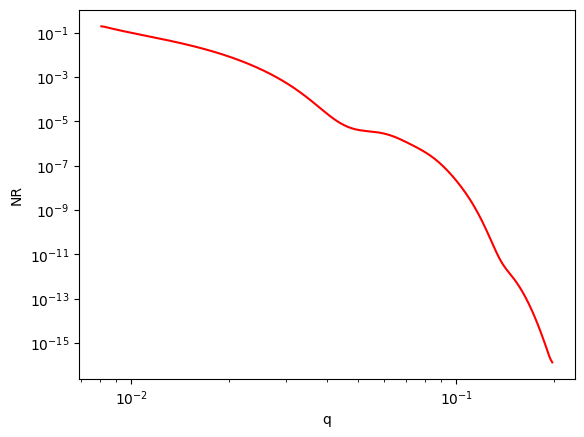

In [60]:
import matplotlib.pyplot as plt

plt.plot(q, r,color = 'red')

plt.yscale('log')
plt.xscale('log')
plt.xlabel('q')
plt.ylabel('NR')
plt.show()






In [31]:
# use refnx to calculate the NR
!pip install refnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 17.8 MB/s eta 0:00:00


In [32]:
import os.path
import numpy as np
import matplotlib.pyplot as plt
import scipy
from refnx.dataset import ReflectDataset, Data1D
from refnx.analysis import Transform, CurveFitter, Objective, Model, Parameter
from refnx.reflect import SLD, Slab, ReflectModel



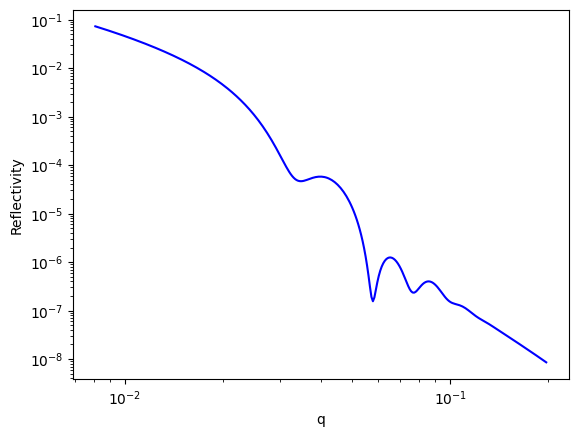

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline
import seaborn as sea
import numpy as np
import matplotlib.pyplot as plt
from refnx.reflect import SLD, Slab, ReflectModel, Structure
from refnx.dataset import ReflectDataset

# Define model
# Initialize the model structure
model_description2 = {
    'layers': [
        # not sure if we need add layer one, because in refnx the layer 1 need set up roungness and sld as 0.
        # {'name': 'Layer 1', 'sld': 0, 'isld': 0, 'thickness': 58.479, 'roughness': 0},
        {'name': 'Layer 2', 'sld': 4.9395, 'isld': 0, 'thickness': 83.334, 'roughness': 23.078},
        {'name': 'Layer 3', 'sld': 4.1019, 'isld': 0, 'thickness': 67.121, 'roughness': 26.748},
        {'name': 'Layer 4', 'sld': 1.9609, 'isld': 0, 'thickness': 117.4, 'roughness': 70.501},
        {'name': 'Layer 5', 'sld': 3.8123, 'isld': 0, 'thickness': 96.051, 'roughness': 35.343},
        {'name': 'Layer 6', 'sld': 3.47, 'isld': 0, 'thickness': 11.655, 'roughness':2.998}
    ],
    'scale': 1,  # Assuming scale remains the same
    'background': 0  # Assuming background remains the same
}


# Create the structure
layers = []
for layer in model_description2['layers']:
    sld = SLD(layer['sld'], name=layer['name'])
    slab = Slab(layer['thickness'], sld, layer['roughness'])
    layers.append(slab)

structure = Structure(layers)

# Create the ReflectModel
model = ReflectModel(structure)
model.scale.setp(model_description2['scale'])
model.bkg.setp(model_description2['background'])

# Define q values
q = np.logspace(np.log10(0.008101436040354381), np.log10(0.1975709062238298), num=308)

# Calculate reflectivity
reflectivity = model(q)

# Plotting
plt.plot(q, reflectivity, color='blue')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('q')
plt.ylabel('Reflectivity')
plt.show()


In [34]:
!pip install BornAgain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 4.8 MB/s eta 0:00:00


In [35]:
# use bornagain do the NR
import bornagain as ba
from bornagain import deg, angstrom
import numpy as np
import matplotlib.pyplot as plt
# define a function to do the calculation
def create_sample(model_description1):
    # Initialize sample with air layer
    air_sld = ba.MaterialBySLD("Air", 0, 0)
    air_layer = ba.Layer(air_sld)
    sample = ba.MultiLayer()
    sample.addLayer(air_layer)

    for layer_info in model_description1['layers']:
        material = ba.MaterialBySLD(layer_info['name'], layer_info['sld']*1e-6, 0)
        layer = ba.Layer(material, layer_info['thickness']*angstrom)
        sample.addLayer(layer)

    return sample











In [36]:
def simulate(sample, alpha_i_values):
    # Define the beam with intensity (1) and wavelength (1.54 angstrom)
    beam = ba.Beam(1, 1.54*angstrom)

    # Define the detector setup
    n_points = len(alpha_i_values)
    detector = ba.SphericalDetector(n_points, 2*deg, 1*deg, 0*deg)

    # Create specular simulation with the defined sample and beam
    simulation = ba.SpecularSimulation()
    simulation.setBeam(beam)
    simulation.setSample(sample)
    simulation.setDetector(detector)

    # Set the range of incident angles
    simulation.setBeamParameters(1.54*angstrom, n_points, alpha_i_values.min()*deg, alpha_i_values.max()*deg)

    # Run simulation
    simulation.runSimulation()
    results = simulation.result()
    reflectivity = results.array()

    return alpha_i_values, reflectivity

In [64]:
# Use two angels calculate Qz.
import math

# Function to calculate qz
def calculate_qz(theta_i, theta_f):
    # Constant pi
    pi = math.pi

    # Calculate qz using the given equation
    qz = 2 * pi * (math.sin(theta_i) + math.sin(theta_f))

    return qz
theta_i = math.radians(30)  # Convert 30 degrees to radians
theta_f = math.radians(45)  # Convert 45 degrees to radians

qz = calculate_qz(theta_i, theta_f)
print(f"qz = {qz}")


qz = 7.584475591748159


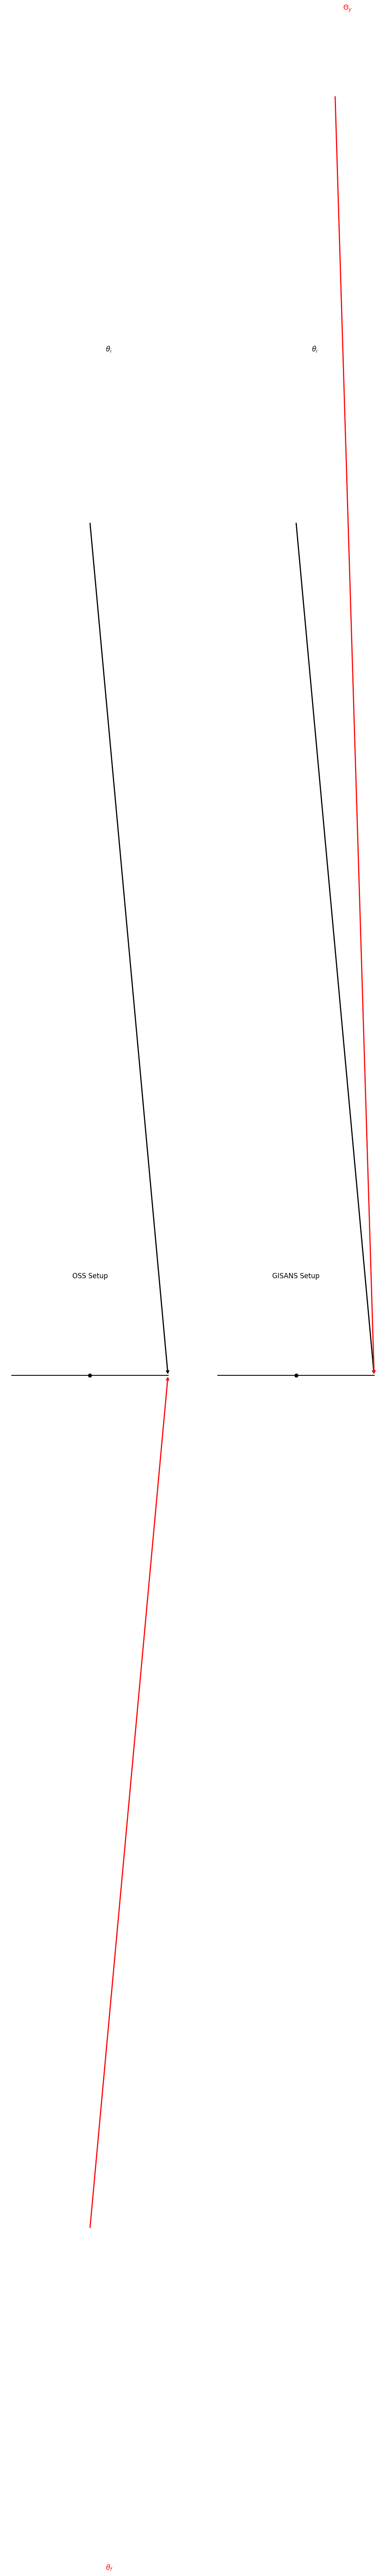

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Function to draw a simple representation of the OSS and GISANS setups
def draw_scattering_setups():
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # OSS Setup
    axs[0].set_title('OSS Setup')
    axs[0].plot([0, 1], [0, 0], 'k')  # Base line
    axs[0].annotate('', xy=(1, 0), xytext=(0.5, 0.5),
                    arrowprops=dict(arrowstyle="->", lw=2))
    axs[0].annotate('', xy=(1, 0), xytext=(0.5, -0.5),
                    arrowprops=dict(arrowstyle="->", lw=2, color='r'))
    axs[0].text(0.6, 0.6, r'$\theta_i$', fontsize=12)
    axs[0].text(0.6, -0.7, r'$\theta_f$', fontsize=12, color='r')

    # GISANS Setup
    axs[1].set_title('GISANS Setup')
    axs[1].plot([0, 1], [0, 0], 'k')  # Base line
    axs[1].annotate('', xy=(1, 0), xytext=(0.5, 0.5),
                    arrowprops=dict(arrowstyle="->", lw=2))
    axs[1].annotate('', xy=(1, 0), xytext=(0.75, 0.75),
                    arrowprops=dict(arrowstyle="->", lw=2, color='r'))
    axs[1].text(0.6, 0.6, r'$\theta_i$', fontsize=12)
    axs[1].text(0.8, 0.8, r'$\Theta_y$', fontsize=12, color='r')

    # Common settings for both subplots
    for ax in axs:
        ax.axis('off')
        ax.plot([0.5], [0], 'ko')  # Incident point

    plt.show()

draw_scattering_setups()


In [67]:
import math

# Constants value set up
pi = math.pi
h = 6.62607015e-34  # Planck's constant in m^2 kg / s
m_neutron = 1.675e-27  # Neutron mass in kg
kB = 1.380649e-23  # Boltzmann's constant in m^2 kg s^-2 K^-1

def calculate_qz(lambda_, theta_i, theta_f):
    """
    Calculate momentum transfer qz.
    """
    qz = (2 * pi / lambda_) * (math.sin(math.radians(theta_i)) + math.sin(math.radians(theta_f)))
    return qz

def smearing_qz(delta_theta_i, delta_theta_f, delta_lambda, theta_i, theta_f, lambda_):
    """
    Calculate smearing over qz due to spread in angles and wavelength.
    """
    term1 = (2 * pi / lambda_) * (math.cos(math.radians(theta_i)) * delta_theta_i + math.cos(math.radians(theta_f)) * delta_theta_f)
    term2 = (2 * pi * (math.sin(math.radians(theta_i)) + math.sin(math.radians(theta_f))) / (lambda_ ** 2)) * delta_lambda
    delta_qz = math.sqrt(term1**2 + term2**2)
    return delta_qz

def neutron_properties(energy):
    """
    Calculate neutron wavelength and velocity given its energy.
    """
    velocity = math.sqrt(2 * energy / m_neutron)
    wavelength = h / (m_neutron * velocity)
    return wavelength, velocity
# calculate the NR, related with wavelength, incoming angel and outgoing angle.
lambda_ = 1e-10  # Wavelength in meters
theta_i = 1  # Incoming angle in degrees
theta_f = 2  # Outgoing angle in degrees
delta_theta_i = 0.01  # Spread in incoming angle in radians
delta_theta_f = 0.01  # Spread in outgoing angle in radians
delta_lambda = 1e-12  # Spread in wavelength in meters
energy = 25e-3 * 1.602e-19  # Neutron energy in Joules (25 meV)

qz = calculate_qz(lambda_, theta_i, theta_f)
delta_qz = smearing_qz(delta_theta_i, delta_theta_f, delta_lambda, theta_i, theta_f, lambda_)
wavelength, velocity = neutron_properties(energy)

print(f"qz: {qz}")
print(f"Delta qz: {delta_qz}")
print(f"Neutron wavelength: {wavelength} m, Velocity: {velocity} m/s")


qz: 3289367086.1078267
Delta qz: 1256589212.5471692
Neutron wavelength: 1.8089741700360983e-10 m, Velocity: 2186.7989281684786 m/s


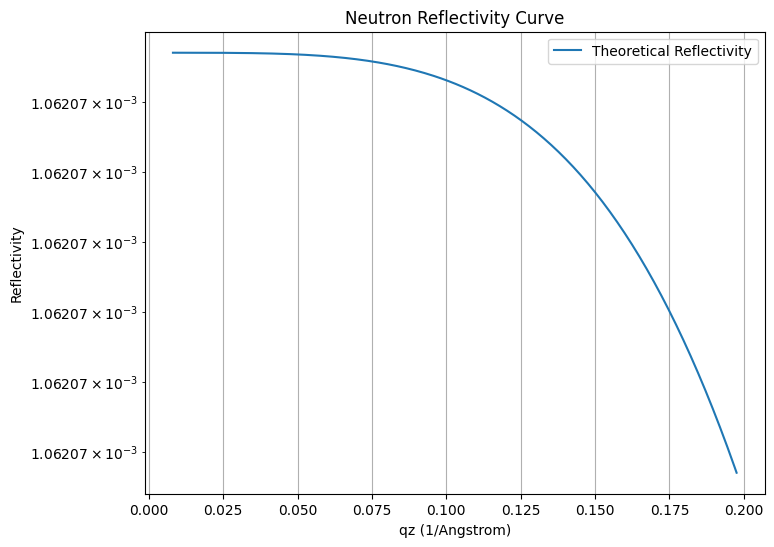

In [70]:
import numpy as np
import matplotlib.pyplot as plt

def parratt_algorithm(qz, layer_params):
    """
    Calculate neutron reflectivity using the Parratt recursive formalism.

    Parameters:
    qz (numpy.ndarray): Array of qz values for which to calculate reflectivity.
    layer_params (list of dicts): List containing parameters for each layer
                                  (thickness, SLD, and roughness).

    Returns:
    numpy.ndarray: Reflectivity calculated for the given qz values.
    """
    # Initialize arrays for reflectivities and phase shifts
    r = np.zeros_like(qz, dtype=complex)
    kzs = np.zeros((len(layer_params) + 1, len(qz)), dtype=complex)

    # Calculate wavevector transfer for each layer
    for i, layer in enumerate(layer_params1):
        kzs[i] = np.sqrt(qz**2 / 4 - 4 * np.pi * layer['SLD'] * 1j)

    # Substrate
    kzs[-1] = np.sqrt(qz**2 / 4 - 4 * np.pi * layer_params[-1]['SLD'] * 1j)

    # Reflectivity calculation using Parratt recursion
    for i in range(len(layer_params) - 1, -1, -1):
        rj = (kzs[i] - kzs[i + 1]) / (kzs[i] + kzs[i + 1])
        phase_shift = np.exp(-2j * kzs[i] * layer_params[i]['thickness'])
        r = (rj + r * phase_shift) / (1 + rj * r * phase_shift)

    return np.abs(r)**2

# Updated layer parameters with  data
layer_params1 = [
    {"thickness": 58.479, "SLD": 4.3356, "roughness": 96.759},
    {"thickness": 83.334, "SLD": 4.9395, "roughness": 23.078},
    {"thickness": 67.121, "SLD": 4.1019, "roughness": 26.748},
    {"thickness": 117.4, "SLD": 1.9609, "roughness": 70.501},
    {"thickness": 96.051, "SLD": 3.8157, "roughness": 35.343},
    {"thickness": 11.655, "SLD": 3.47, "roughness": 2.998}
]

# Define qz range for calculation
qz = np.linspace(0.008101436040354381, 0.1975709062238298, 308)

# Calculate reflectivity using the Parratt algorithm
reflectivity = parratt_algorithm(qz, layer_params1)

# Plotting the reflectivity curve
plt.figure(figsize=(8, 6))
plt.plot(qz, reflectivity, label='Theoretical Reflectivity')
plt.xlabel('qz (1/Angstrom)')
plt.ylabel('Reflectivity')
plt.title('Neutron Reflectivity Curve')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()


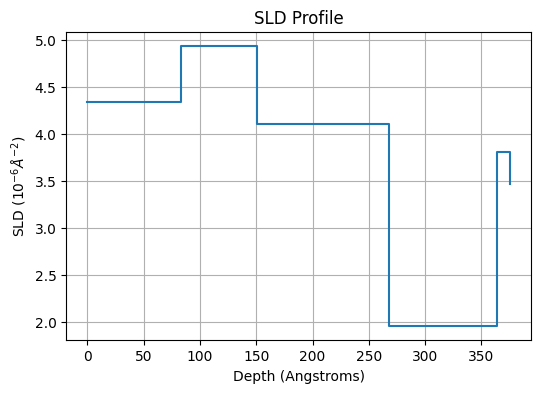

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Unit conversion functions
def angstrom_to_nm(value):
    return value / 10

def nm_to_angstrom(value):
    return value * 10

# Parameter validation functions with more informative error messages
def validate_sld(sld, layer_name):
    assert 0 < sld < 10, f"SLD value of {layer_name} out of expected range (0-10 Ang^-2)"

def validate_thickness(thickness, layer_name):
    # Allow thickness of 0 specifically for substrates or similar layers
    if layer_name.lower() == 'substrate':
        assert thickness == 0, f"Substrate layer '{layer_name}' should have a thickness of 0 Angstroms"
    else:
        # Ensure other layers have a thickness within the expected range
        assert 0 < thickness < 20000000, f"Layer thickness of '{layer_name}' out of expected range (0-20000 Angstroms)"

def validate_roughness(roughness, max_thickness, layer_name):
    # Special handling for the substrate or layers where roughness check might not apply
    if layer_name.lower() == 'substrate':
        assert roughness == 0, f"Roughness of '{layer_name}' should be 0 Angstroms as it's a substrate"
    else:
        assert 0 <= roughness < max_thickness, f"Roughness of '{layer_name}' should be less than layer thickness and within a reasonable range"

# Function to plot SLD profile
def plot_sld_profile(layer_params):
    depths = [0]
    sld_values = [layer_params2[0]['SLD']]
    for layer in layer_params:
        depths.append(depths[-1] + layer['thickness'])
        sld_values.append(layer['SLD'])
        depths.append(depths[-1])
        sld_values.append(layer['SLD'])
    plt.figure(figsize=(6, 4))
    plt.step(depths, sld_values, where='post')
    plt.xlabel('Depth (Angstroms)')
    plt.ylabel('SLD ($10^{-6} \AA^{-2}$)')
    plt.title('SLD Profile')
    plt.grid(True)
    plt.show()
    # Example layer parameters

layer_params2 = [
    {'name': 'Substrate', 'thickness': 0, 'SLD': 4.3356, 'roughness': 0},
    {'name': 'Layer 2', 'thickness': 83.334, 'SLD': 4.9395, 'roughness': 23.078},
    {'name': 'Layer 3', 'thickness': 67.121, 'SLD': 4.1019, 'roughness': 26.748},
    {'name': 'Layer 4', 'thickness': 117.4, 'SLD': 1.9609, 'roughness': 70.501},
    {'name': 'Layer 5', 'thickness': 96.051, 'SLD': 3.8123, 'roughness':35.343 },
    {'name': 'Layer 6', 'thickness': 11.655, 'SLD': 3.47, 'roughness':2.998 }
]
# Validate parameters and plot SLD profile
for layer in layer_params2:
    validate_sld(layer['SLD'], layer['name'])
    validate_thickness(layer['thickness'], layer['name'])
    validate_roughness(layer['roughness'], layer['thickness'], layer['name'])


plot_sld_profile(layer_params2)





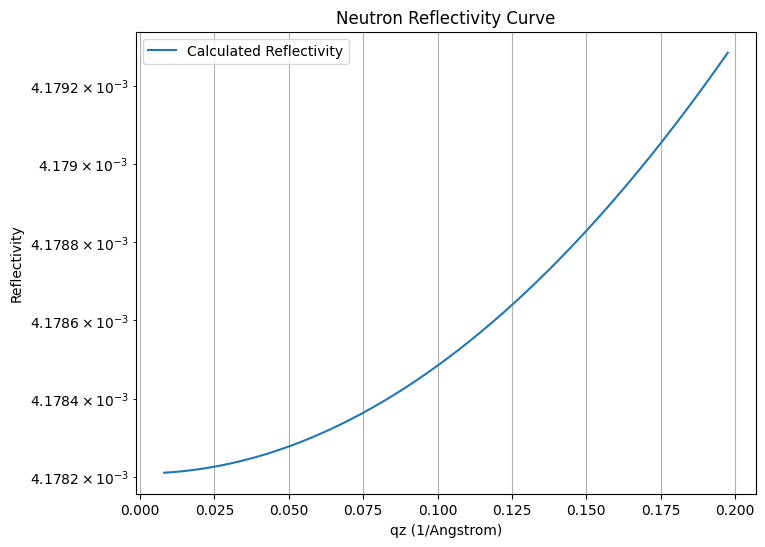

In [74]:
import numpy as np
import matplotlib.pyplot as plt

def safe_exp(x):
    """Safe exponential function to avoid overflow in the real part."""
    MAX_ARG = 100  # Maximum argument to exp to prevent overflow, adjust as needed
    return np.exp(np.clip(x, -MAX_ARG, MAX_ARG))

def safe_complex_exp(z):
    """Safe complex exponential function to avoid overflow in complex exponentials."""
    real_part = np.real(z)
    imag_part = np.imag(z)
    # Apply safe exponential to the real part and compute the complex exponential
    return safe_exp(real_part) * (np.cos(imag_part) + 1j * np.sin(imag_part))

def fresnel_reflectivity(kz1, kz2, roughness):
    """Calculate Fresnel reflectivity for an interface, including roughness effects."""
    r = (kz1 - kz2) / (kz1 + kz2)
    if roughness > 0:
        r *= safe_exp(-2 * kz1 * kz2 * roughness**2)  # Use safe_exp for roughness
    return r
def parratt_algorithm(qz, layer_params3):
    """Calculate neutron reflectivity using an enhanced Parratt recursive formalism."""
    k0 = qz / 2  # Incident wavevector
    reflectivity = np.zeros_like(qz)

    for i, q in enumerate(qz):
        kz = [np.sqrt((q / 2)**2 - 4 * np.pi * layer['SLD'] + 0j) for layer in layer_params3]
        r = 0  # Initialize reflectivity for the topmost layer

        for j in range(len(layer_params3) - 1, 0, -1):
            rj = fresnel_reflectivity(kz[j-1], kz[j], layer_params3[j]['roughness'])
            # Use safe_complex_exp for phase shift to avoid overflow
            phase_shift = safe_complex_exp(-2j * kz[j] * layer_params3[j]['thickness'])
            r = (rj + r * phase_shift) / (1 + rj * r * phase_shift)

        reflectivity[i] = np.abs(r)**2  # Square of the absolute value to get reflectivity

    return reflectivity



layer_params3 = [
    {'name': 'Substrate', 'thickness': 0, 'SLD': 4.3356, 'roughness': 0},
    {'name': 'Layer 2', 'thickness': 83.334, 'SLD': 4.9395, 'roughness': 23.078},
    {'name': 'Layer 3', 'thickness': 67.121, 'SLD': 4.1019, 'roughness': 26.748},
    {'name': 'Layer 4', 'thickness': 117.4, 'SLD': 1.9609, 'roughness': 70.501},
    {'name': 'Layer 5', 'thickness': 96.051, 'SLD': 3.8123, 'roughness':35.343 },
    {'name': 'Layer 6', 'thickness': 11.655, 'SLD': 3.47, 'roughness':2.998 }
]

# qz range for calculation
qz = np.linspace(0.008101436040354381, 0.1975709062238298, 308)

# Calculate reflectivity
reflectivity = parratt_algorithm(qz, layer_params3)


plt.figure(figsize=(8, 6))
plt.plot(qz, reflectivity, label='Calculated Reflectivity')
plt.xlabel('qz (1/Angstrom)')
plt.ylabel('Reflectivity')
plt.title('Neutron Reflectivity Curve')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()


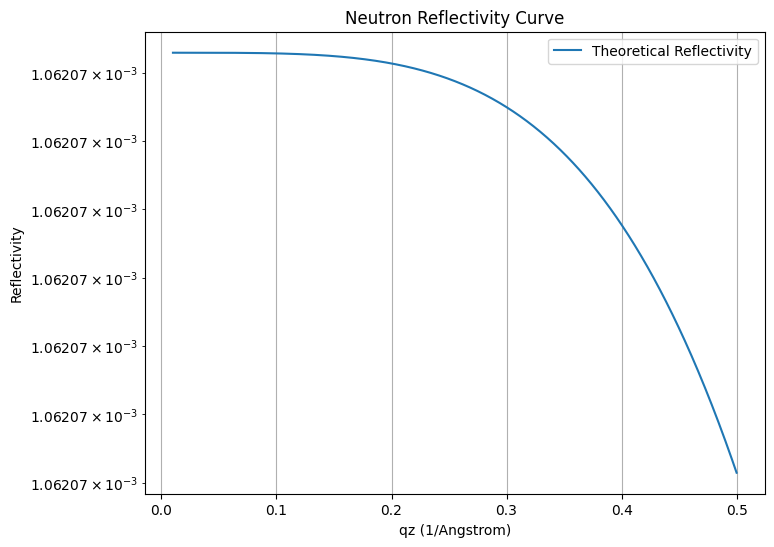

In [75]:
import numpy as np
import matplotlib.pyplot as plt

def parratt_algorithm(qz, layer_params):
    """
    Calculate neutron reflectivity using the Parratt recursive formalism.

    Parameters:
    qz (numpy.ndarray): Array of qz values for which to calculate reflectivity.
    layer_params (list of dicts): List containing parameters for each layer
                                  (thickness, SLD, and roughness).

    Returns:
    numpy.ndarray: Reflectivity calculated for the given qz values.
    """
    # Initialize arrays for reflectivities and phase shifts
    r = np.zeros_like(qz, dtype=complex)
    kzs = np.zeros((len(layer_params4) + 1, len(qz)), dtype=complex)

    # Calculate wavevector transfer for each layer
    for i, layer in enumerate(layer_params4):
        kzs[i] = np.sqrt(qz**2 / 4 - 4 * np.pi * layer['SLD'] * 1j)

    # Substrate
    kzs[-1] = np.sqrt(qz**2 / 4 - 4 * np.pi * layer_params4[-1]['SLD'] * 1j)

    # Reflectivity calculation using Parratt recursion
    for i in range(len(layer_params4) - 1, -1, -1):
        rj = (kzs[i] - kzs[i + 1]) / (kzs[i] + kzs[i + 1])
        phase_shift = np.exp(-2j * kzs[i] * layer_params4[i]['thickness'])
        r = (rj + r * phase_shift) / (1 + rj * r * phase_shift)

    return np.abs(r)**2

# Layer parameters from your data
layer_params4 = [
    {"thickness": 58.479, "SLD": 4.3356, "roughness": 96.759},
    {"thickness": 83.334, "SLD": 4.9395, "roughness": 23.078},
    {"thickness": 67.121, "SLD": 4.1019, "roughness": 26.748},
    {"thickness": 117.4, "SLD": 1.9609, "roughness": 70.501},
    {"thickness": 96.051, "SLD": 3.8123, "roughness": 35.343},
    {"thickness": 11.655, "SLD": 3.47, "roughness": 2.998}
]

# Define qz range for calculation
qz = np.linspace(0.01, 0.5, 1000)  # Adjust qz range as needed

# Calculate reflectivity using the Parratt algorithm
reflectivity = parratt_algorithm(qz, layer_params4)

# Plotting the reflectivity curve
plt.figure(figsize=(8, 6))
plt.plot(qz, reflectivity, label='Theoretical Reflectivity')
plt.xlabel('qz (1/Angstrom)')
plt.ylabel('Reflectivity')
plt.title('Neutron Reflectivity Curve')
plt.yscale('log')  # Reflectivity curves are often plotted on a logarithmic scale
plt.legend()
plt.grid(True)
plt.show()


In [44]:
def safe_trig(func, x):
    if np.iscomplex(x):
        # Apply modulus to the real part for complex numbers
        x_real_mod = np.mod(np.real(x), 2 * np.pi)
        x = x_real_mod + 1j * np.imag(x)
    else:
        x = np.mod(x, 2 * np.pi)
    return func(x)

def calculate_transfer_matrix(kz1, kz2, thickness):
    m11 = m22 = safe_trig(np.cos, kz2 * thickness)
    # Check for small or zero kz2 to avoid division by zero
    if np.abs(kz2) > 1e-10:
        m12 = (1j / kz2) * safe_trig(np.sin, kz2 * thickness)
        m21 = 1j * kz2 * safe_trig(np.sin, kz2 * thickness)
    else:
        m12 = m21 = 0
    layer_matrix = np.array([[m11, m12], [m21, m22]])
    # Similar check for kz1 and kz2 before matrix multiplication
    if np.all(np.abs([kz1, kz2]) > 1e-10):
        interface_matrix = np.array([[1, 1], [kz1, -kz1]]) @ np.linalg.inv(np.array([[1, 1], [kz2, -kz2]]))
        return interface_matrix @ layer_matrix
    else:
        return np.identity(2)


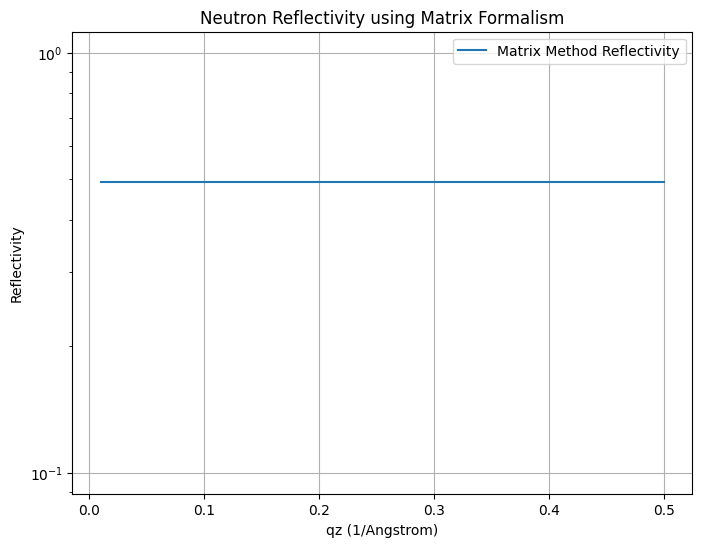

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_kz(qz, sld):
    """Calculate wavevector transfer perpendicular to the layers."""
    # Neutron wavelength in vacuum (choose a typical value)
    wavelength = 4.75  # in Angstroms
    k0 = 2 * np.pi / wavelength
    return np.sqrt(k0**2 - 16 * np.pi * sld + 0j)

def exp_trig_sin(x):
    """Compute sin(x) using exponential functions for better numerical stability."""
    return (np.exp(1j * x) - np.exp(-1j * x)) / (2j)

def exp_trig_cos(x):
    """Compute cos(x) using exponential functions for better numerical stability."""
    return (np.exp(1j * x) + np.exp(-1j * x)) / 2

def calculate_transfer_matrix(kz1, kz2, thickness):
    """Calculate the transfer matrix for a single interface and layer using exponential trigonometric functions."""
    m11 = m22 = exp_trig_cos(kz2 * thickness)
    m12 = (1j / kz2) * exp_trig_sin(kz2 * thickness) if np.abs(kz2) > 1e-10 else 0
    m21 = 1j * kz2 * exp_trig_sin(kz2 * thickness) if np.abs(kz2) > 1e-10 else 0
    layer_matrix = np.array([[m11, m12], [m21, m22]])

    if np.all(np.abs([kz1, kz2]) > 1e-10):
        interface_matrix = np.array([[1, 1], [kz1, -kz1]]) @ np.linalg.inv(np.array([[1, 1], [kz2, -kz2]]))
        return interface_matrix @ layer_matrix
    else:
        return np.identity(2)

def calculate_reflectivity(qz, layer_params_example):
    """Calculate neutron reflectivity using the matrix formalism."""
    reflectivity = np.zeros_like(qz, dtype=np.complex_)

    for i, q in enumerate(qz):
        kz_substrate = calculate_kz(q, layer_params_example[-1]['SLD'])
        system_matrix = np.identity(2, dtype=np.complex_)

        for layer in reversed(layer_params_example[:-1]):
            kz_layer = calculate_kz(q, layer['SLD'])
            system_matrix = calculate_transfer_matrix(kz_substrate, kz_layer, layer['thickness']) @ system_matrix
            kz_substrate = kz_layer

        r = system_matrix[1, 0] / system_matrix[0, 0]
        reflectivity[i] = np.abs(r)**2

    return reflectivity

# Define layer parameters: thickness (Angstroms), SLD (1e-6 Angstroms^-2), and possibly roughness if included the model
layer_params_example = [
    {'name': 'Layer 1', 'thickness': 50.0, 'SLD': 2.07e-6},  # Example layer
    {'name': 'Layer 2', 'thickness': 100.0, 'SLD': 3.47e-6},  # Another layer
    {'name': 'Substrate', 'thickness': 0, 'SLD': 6.36e-6},  # Substrate (last element)
]


# Define qz range for calculation
qz = np.linspace(0.01, 0.5, 1000)

# Calculate reflectivity
reflectivity = calculate_reflectivity(qz, layer_params_example)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(qz, np.abs(reflectivity), label='Matrix Method Reflectivity')  # Ensure reflectivity is plotted as absolute value
plt.xlabel('qz (1/Angstrom)')
plt.ylabel('Reflectivity')
plt.title('Neutron Reflectivity using Matrix Formalism')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()
